# FEATURE ENGINEERING

Feature engineering is the process of selecting, transforming, extracting, combining, and manipulating raw data to generate the desired variables for analysis or predictive modeling . It is a crucial step in developing a machine learning model. Feature engineering can be done using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process.

###  Numerical Transformation Introduction

We’ll focus on the following numerical transformations:

* Centering
* Standard Scaler
* Min and Max Scaler
* Binning
* Log transformations

### Centering Your Data

Centering data is a data preprocessing technique used to shift the values of a numerical variable so that they are centered around a common reference point, typically the mean (average) of the variable. This process involves subtracting the mean of the variable from each data point. Centering data is also known as mean-centering or zero-centering.

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

coffee = pd.read_csv("starbucks_customers.csv")

print(coffee.columns)

Index(['spent', 'nearest_starbucks', 'age', 'rate_quality', 'rate_price',
       'rate_promo', 'ambiance', 'wifi', 'service', 'meetings_hangout'],
      dtype='object')


In [18]:
print(coffee.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   spent              122 non-null    int64
 1   nearest_starbucks  122 non-null    int64
 2   age                122 non-null    int64
 3   rate_quality       122 non-null    int64
 4   rate_price         122 non-null    int64
 5   rate_promo         122 non-null    int64
 6   ambiance           122 non-null    int64
 7   wifi               122 non-null    int64
 8   service            122 non-null    int64
 9   meetings_hangout   122 non-null    int64
dtypes: int64(10)
memory usage: 9.7 KB
None


In [19]:
## create ages variable
ages = coffee['age']

In [20]:
## get min and print
min_age = np.min(ages)
print(min_age)

13


In [21]:
## get max and print
max_age = np.max(ages)
print(max_age)

70


In [22]:
## print the range
print(max_age - min_age)

57


In [29]:
## find the mean
mean_age = np.mean(ages)
print(mean_age)

27.33606557377049


In [32]:
## center ages
centered_ages = round((ages - mean_age),2)
print(centered_ages)

0      24.66
1       7.66
2       1.66
3       0.66
4       0.66
       ...  
117    -5.34
118    -5.34
119    -7.34
120    -7.34
121   -13.34
Name: age, Length: 122, dtype: float64


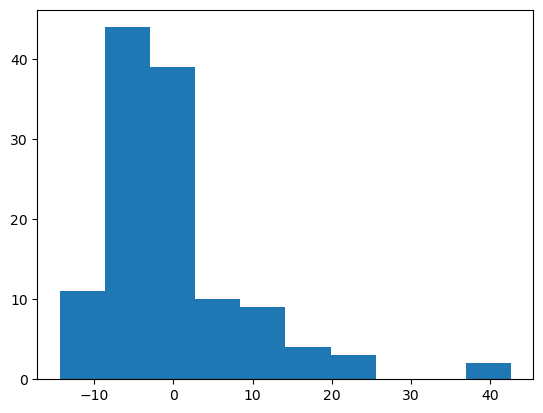

In [33]:
## graph it
plt.hist(centered_ages)
plt.show();

### Standardizing our Data
Standardization (also known as Z-Score normalization) is when we center our data, then divide it by the standard deviation. Once we do that, our entire data set will have a mean of zero and a standard deviation of one. This allows all of our features to be on the same scale.

In [35]:
# set up your variables
coffee = pd.read_csv('starbucks_customers.csv')
ages = coffee['age']
mean_age = np.mean(ages)
std_dev_age = np.std(ages)

In [36]:
## standardize ages
ages_standardized = (ages-mean_age)/std_dev_age

In [47]:
## print the results 
mean = np.mean(ages_standardized)
std_dev = np.std(ages_standardized)

# Print the mean and standard deviation rounded to two decimal places
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Mean: 0.00
Standard Deviation: 1.00


In [50]:
# Print ages_standardized

print(f"Ages_standardized: {ages_standardized.head(10)}")

Ages_standardized: 0    2.615912
1    0.812854
2    0.176481
3    0.070418
4    0.070418
5    0.070418
6   -0.035644
7   -0.141706
8   -0.141706
9   -0.141706
Name: age, dtype: float64


### Standardizing Data with Sklearn

In [54]:
from sklearn.preprocessing import StandardScaler 

In [55]:
ages = coffee['age']

In [58]:
scaler = StandardScaler()
ages_reshaped = np.array(ages).reshape(-1,1)
ages_scaled = scaler.fit_transform(ages_reshaped)

In [59]:
## print the results 
mean = np.mean(ages_scaled)
std_dev = np.std(ages_scaled)

# Print the mean and standard deviation rounded to two decimal places
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Mean: 0.00
Standard Deviation: 1.00


### Min-Max Normalization

MinMax normalization, also known as feature scaling, is a data preprocessing technique used in statistics and machine learning to rescale numerical variables within a specific range, typically between 0 and 1. It involves transforming each data point by subtracting the minimum value of the variable and then dividing it by the range (the difference between the maximum and minimum values). This process ensures that all the values in the dataset fall within the specified range, making it easier to compare and analyze the variables, while also preventing certain variables from dominating others in algorithms that rely on distance or magnitude. MinMax normalization is particularly useful in machine learning when working with models that are sensitive to the scale of input features, such as neural networks and support vector machines.

In [60]:
## get spent feature
spent = coffee["spent"]

In [61]:
#find the max spent
max_spent = np.max(spent)

In [62]:
#find the min spent
min_spent = np.min(spent)

In [63]:
#find the difference
spent_range = max_spent - min_spent

In [64]:
#normalize your spent feature
spent_normalized = (spent-min_spent)/spent_range

In [66]:
#print your results
print(spent_normalized.head())

0    0.464286
1    0.892857
2    0.357143
3    0.250000
4    0.357143
Name: spent, dtype: float64


### Min-Max Normalization with Sklearn

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
spent = coffee['spent']

In [70]:
## write your code below
spent_reshaped = np.array(spent).reshape(-1,1)

mmscaler = MinMaxScaler()

reshaped_scaled = mmscaler.fit_transform(spent_reshaped)
print(np.min(reshaped_scaled))
print(np.max(reshaped_scaled))

0.0
1.0


### Binning Data

Data binning, also known as data bucketing or data discretization, is a data pre-processing technique used to reduce the effects of minor observation errors . The original data values are divided into small intervals known as bins, and then they are replaced by a general value calculated for that bin . Binning is a generalization of rounding and is related to quantization .

In [71]:
ages = coffee['age']

In [72]:
print(np.min(ages))
print(np.max(ages))

13
70


In [75]:
age_bins = [12, 20, 30, 40, 71]

In [76]:
coffee['binned_ages'] = pd.cut(coffee['age'], age_bins, right = False)

In [79]:
print(coffee['binned_ages'].head(10))

0    [40, 71)
1    [30, 40)
2    [20, 30)
3    [20, 30)
4    [20, 30)
5    [20, 30)
6    [20, 30)
7    [20, 30)
8    [20, 30)
9    [20, 30)
Name: binned_ages, dtype: category
Categories (4, interval[int64, left]): [[12, 20) < [20, 30) < [30, 40) < [40, 71)]


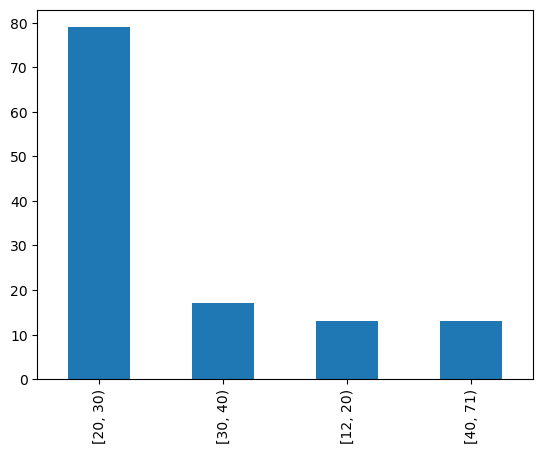

In [80]:
coffee['binned_ages'].value_counts().plot(kind='bar')
plt.show()

### Natural Log Transformation

Logarithms are an essential tool in statistical analysis and machine learning preparation. This transformation works well for right-skewed data and data with large outliers. After we log transform our data, one large benefit is that it will allow the data to be closer to a “normal” distribution. It also changes the scale so our data points will drastically reduce the range of their values.

Using a log transformation in a machine learning model will require some extra interpretation. For example, if you were to log transform your data in a linear regression model, our independent variable has a multiplication relationship with our dependent variable instead of the usual additive relationship we would have if our data was not log-transformed.

Keep in mind, just because your data is skewed does not mean that a log transformation is the best answer. You would not want to log transform your feature if:

* You have values less than 0. The natural logarithm (which is what we’ve been talking about) of a negative number is undefined.

* You have left-skewed data. That data may call for a square or cube transformation.

* You have non-parametric data

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e 

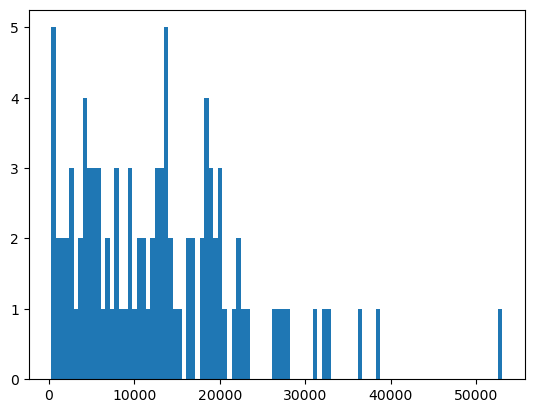

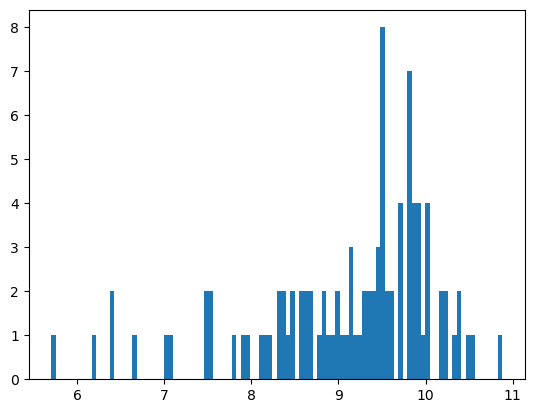

In [189]:
cars = pd.read_csv("cars.csv")

## set you price variable
prices = cars['sellingprice']

## plot a histogram of prices
plt.hist(prices, bins = 100)
plt.show()

## log transform prices
log_prices = np.log(prices)

## plot a histogram of log_prices
plt.hist(log_prices, bins = 100)
plt.show()

# Encoding Categorical Variables

In [190]:
import pandas as pd

# import data
cars = pd.read_csv('cars.csv')
cars = cars.drop(columns=["Unnamed: 0", "Unnamed: 16"])
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2006,Chrysler,300,Base,Sedan,automatic,2c3ka43r76h366165,il,1.9,119618.0,blue,gray,go financial,4775,2500,Thu May 28 2015 03:00:00 GMT-0700 (PDT)
1,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,—,black,volkswagen credit inc/sc,12050,12750,Wed Jul 01 2015 09:30:00 GMT-0700 (PDT)
2,2007,Dodge,Durango,SLT,SUV,automatic,1d8hd48p97f510727,fl,1.9,166628.0,gold,tan,mid atlantic finance/clearwater,2850,2700,Wed Feb 11 2015 08:00:00 GMT-0800 (PST)
3,2013,Mercedes-Benz,E-Class,E350 Sport,Sedan,automatic,wddhf5kb3da735753,tx,3.8,23923.0,white,off-white,mercedes-benz financial services,32200,32000,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
4,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d84dgc59887,mi,5.0,18494.0,red,black,"ford motor credit company,llc",29100,28100,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT)


In [168]:
# check variable types
print(cars.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object


### Ordinal encoding

In [169]:
print(cars['transmission'].value_counts())

automatic    87
manual        5
Name: transmission, dtype: int64


In [170]:
# create dictionary of label:values in order
tran_dict = {'automatic':1, 'manual':0}

#create a new column 
cars['transmission'] = cars['transmission'].map(tran_dict)

In [171]:
print(cars['transmission'].value_counts())

1.0    87
0.0     5
Name: transmission, dtype: int64


In [186]:
print(cars['transmission'].head())

0    automatic
1       manual
2    automatic
3    automatic
4    automatic
Name: transmission, dtype: object


In [187]:
# using scikit-learn


print(cars['transmission'].head())
 

0    automatic
1       manual
2    automatic
3    automatic
4    automatic
Name: transmission, dtype: object


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# create encoder and set category order
encoder = OrdinalEncoder(categories=[['automatic', 'manual']])

# reshape our feature
condition_reshaped = cars['transmission'].values.reshape(-1,1)

# create new variable with assigned numbers
cars['transmission'] = encoder.fit_transform(condition_reshaped)

### Label Encoding

Now, we can talk about nominal data, and we have to approach this type of data differently than what we did with ordinal data. Our color feature has a lot of different labels, but here are the top five colors that appear in our data frame.

In [177]:
print(cars['color'].nunique())

13


In [178]:
print(cars['color'].value_counts()[:5])

black     20
white     17
silver    15
blue      13
gray      11
Name: color, dtype: int64


To prepare this feature, we still need to convert our text to numbers, so let’s do just that. We will demonstrate two different approaches, with the first one showing how to convert the feature from an object type to a categories type.

In [179]:
# convert feature to category type
cars['color'] = cars['color'].astype('category')

In [180]:
# save new version of category codes
cars['color'] = cars['color'].cat.codes

In [181]:
# print to see transformation
print(cars['color'].value_counts()[:5])

0     20
11    17
9     15
1     13
5     11
Name: color, dtype: int64


One more way we can transform this feature is by using sklearn.preprocessing and the LabelEncoder library. This method will not work if your feature has NaN values. Those need to be addressed prior to running .fit_transform.

In [182]:
from sklearn.preprocessing import LabelEncoder

# create encoder
encoder = LabelEncoder()

# create new variable with assigned numbers
cars['color'] = encoder.fit_transform(cars['color'])

In [183]:
# print to see transformation
print(cars['color'].value_counts()[:5])

0     20
11    17
9     15
1     13
5     11
Name: color, dtype: int64


### One-hot Encoding

One-hot encoding is when we create a dummy variable for each value of our categorical feature, and a dummy variable is defined as a numeric variable with two values: 1 and 0. 

In [193]:
import pandas as pd
# use pandas .get_dummies method to create one new column for each color
ohe = pd.get_dummies(cars['color'])

# join the new columns back onto our cars dataframe
cars = cars.join(ohe)

In [194]:
print(cars.columns.values)

['year' 'make' 'model' 'trim' 'body' 'transmission' 'vin' 'state'
 'condition' 'odometer' 'color' 'interior' 'seller' 'mmr' 'sellingprice'
 'saledate' 'black' 'blue' 'brown' 'burgundy' 'gold' 'gray' 'green'
 'orange' 'red' 'silver' 'turquoise' 'white' '—']


In [214]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,burgundy,gold,gray,green,orange,red,silver,turquoise,white,—
0,2006,Chrysler,300,Base,Sedan,automatic,2c3ka43r76h366165,il,1.9,119618.0,...,0,0,0,0,0,0,0,0,0,0
1,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,...,0,0,0,0,0,0,0,0,0,1
2,2007,Dodge,Durango,SLT,SUV,automatic,1d8hd48p97f510727,fl,1.9,166628.0,...,0,1,0,0,0,0,0,0,0,0
3,2013,Mercedes-Benz,E-Class,E350 Sport,Sedan,automatic,wddhf5kb3da735753,tx,3.8,23923.0,...,0,0,0,0,0,0,0,0,1,0
4,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d84dgc59887,mi,5.0,18494.0,...,0,0,0,0,0,1,0,0,0,0


### Binary encoding

If we find the need to one-hot encode a lot of categorical features which would, in turn, create a sparse matrix and may cause problems for our model, a strong alternative to this issue is performing a binary encoder. 

To make this happen with Python we’ll use a library called category_encoders and import BinaryEncoder. We will determine which column to transform and set drop_invariant to True so it will keep the five binary columns. If it is set to the default 0, then we would have an additional column full of zeros.

In [224]:
from category_encoders import BinaryEncoder
cars = pd.read_csv('cars.csv')
cars = cars.drop(columns=["Unnamed: 0", "Unnamed: 16"])

cars.color.unique()

array(['blue', '—', 'gold', 'white', 'red', 'silver', 'black', 'gray',
       'burgundy', 'brown', 'turquoise', 'orange', 'green'], dtype=object)

In [ ]:
#this will create a new data frame with the color column removed and replaced with our 5 new binary feature columns
colors = BinaryEncoder(cols = ['color'], drop_invariant = True).fit_transform(cars)

In [220]:
colors.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color_0,color_1,color_2,color_3,interior,seller,mmr,sellingprice,saledate
0,2006,Chrysler,300,Base,Sedan,automatic,2c3ka43r76h366165,il,1.9,119618.0,0,0,0,1,gray,go financial,4775,2500,Thu May 28 2015 03:00:00 GMT-0700 (PDT)
1,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,0,0,1,0,black,volkswagen credit inc/sc,12050,12750,Wed Jul 01 2015 09:30:00 GMT-0700 (PDT)
2,2007,Dodge,Durango,SLT,SUV,automatic,1d8hd48p97f510727,fl,1.9,166628.0,0,0,1,1,tan,mid atlantic finance/clearwater,2850,2700,Wed Feb 11 2015 08:00:00 GMT-0800 (PST)
3,2013,Mercedes-Benz,E-Class,E350 Sport,Sedan,automatic,wddhf5kb3da735753,tx,3.8,23923.0,0,1,0,0,off-white,mercedes-benz financial services,32200,32000,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
4,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d84dgc59887,mi,5.0,18494.0,0,1,0,1,black,"ford motor credit company,llc",29100,28100,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT)


### Hashing

Another option we have available to us is an encoding technique called hashing. This process is similar to one-hot encoding where it will create new binary columns, but within the parameters, you can decide how many features to output. A huge advantage is reduced dimensionality, but a large disadvantage is that some categories will be mapped to the same values. That is called collision.

For example, we have 13 different colored cars. If I were to use the hash encoder and set the number of features to be 5, I will definitely have a few colors with the same hash values.

In [227]:
from category_encoders import HashingEncoder

# instantiate our encoder
encoder = HashingEncoder(cols='color', n_components=5)

# do a fit transform on our color column and set to a new variable
hash_results = encoder.fit_transform(cars['color'])

Now you may be thinking, when would I use this if I’m going to lose information and my model will see brown and charcoal (or some other color combo with the same hash value) as the same thing? Well, this could be a solution to your project and dataset if you are not as interested in assessing the impact of any particular categorical value.

### Target encoding

Target encoding is a Bayesian encoder used to transform categorical features into hashed numerical values and is sometimes called the mean encoder. This encoder can be utilized for data sets that are being prepared for regression-based supervised learning, as it needs to take into consideration the mean of the target variable and its correlation between each individual category of our feature. In fact, the numerical values of each category is replaced with a blend of the posterior probability of the target given a particular categorical value and the prior probability of the target over all the training data.

In [229]:
from category_encoders import TargetEncoder

# instantiate our encoder
encoder = TargetEncoder(cols = 'color')

# set the results of our fit_transform to a variable 
# the output will be its own pandas series
encoder_results = encoder.fit_transform(cars['color'], cars['sellingprice'])

print(encoder_results.head())

          color
0  12360.751686
1  13663.515802
2  11570.044926
3  15500.236918
4  12534.050296


In [230]:
print(np.sort(encoder_results['color'].unique()))

[11359.91138339 11495.34233559 11536.02567262 11570.04492637
 12360.75168577 12524.85007778 12534.05029568 13032.2731278
 13081.13636364 13409.58770345 13663.51580164 14436.97773902
 15500.23691838]


### Encoding date-time variables

Every data analyst or scientist will have to work with date-time objects at some point in their career. There is so much information to be gained from date-time objects.The very first thing we need to do is convert this to a date-time object.

In [239]:
print(cars['saledate'].dtypes)
cars.saledate.head()

object


0    2015-05-28 03:00:00+07:00
1    2015-07-01 09:30:00+07:00
2    2015-02-11 08:00:00+08:00
3    2015-02-12 03:00:00+08:00
4    2015-06-11 02:30:00+07:00
Name: saledate, dtype: object

In [246]:
cars['saledate'] = pd.to_datetime(cars['saledate'],utc=True)

In [247]:
print(cars['saledate'].dtypes)

datetime64[ns, UTC]


In [244]:
# create new variable for month
cars['month'] = cars['saledate'].dt.month

# create new variable for day of the week
cars['dayofweek'] = cars['saledate'].dt.day

# create new variable for difference between cars model year and year sold
cars['yearbuild_sold'] = cars['saledate'].dt.year - cars['year']